In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Read of csv dataset

salary_df = pd.read_csv("C:/Users/Platini/Desktop/Dataset/CO/Dataset/ds_salaries.csv")
                   
salary_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
salary_df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
salary_df.drop([ 'Unnamed: 0'], axis="columns", inplace=True)

In [9]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [21]:
salary_df[['salary','salary_in_usd']].describe()

,salary,salary_in_usd
count,6.070000e+02,607.000000
mean,3.240001e+05,112297.869852
std,1.544357e+06,70957.259411
min,4.000000e+03,2859.000000
25%,7.000000e+04,62726.000000
50%,1.150000e+05,101570.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


In [17]:
salary_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [22]:
for i in salary_df:
    print("No of Values for {} is {}".format(i,str(salary_df[i].nunique())))

No of Values for work_year is 3
No of Values for experience_level is 4
No of Values for employment_type is 4
No of Values for job_title is 50
No of Values for salary is 272
No of Values for salary_currency is 17
No of Values for salary_in_usd is 369
No of Values for employee_residence is 57
No of Values for remote_ratio is 3
No of Values for company_location is 50
No of Values for company_size is 3


In [24]:
salary_df.shape

(607, 11)

## Exploratory of data and Visualization

In [28]:
job_titles_df = salary_df[salary_df['job_title'] == 'Data Scientist'].count()
job_titles_df

work_year             143
experience_level      143
employment_type       143
job_title             143
salary                143
salary_currency       143
salary_in_usd         143
employee_residence    143
remote_ratio          143
company_location      143
company_size          143
dtype: int64

<BarContainer object of 607 artists>

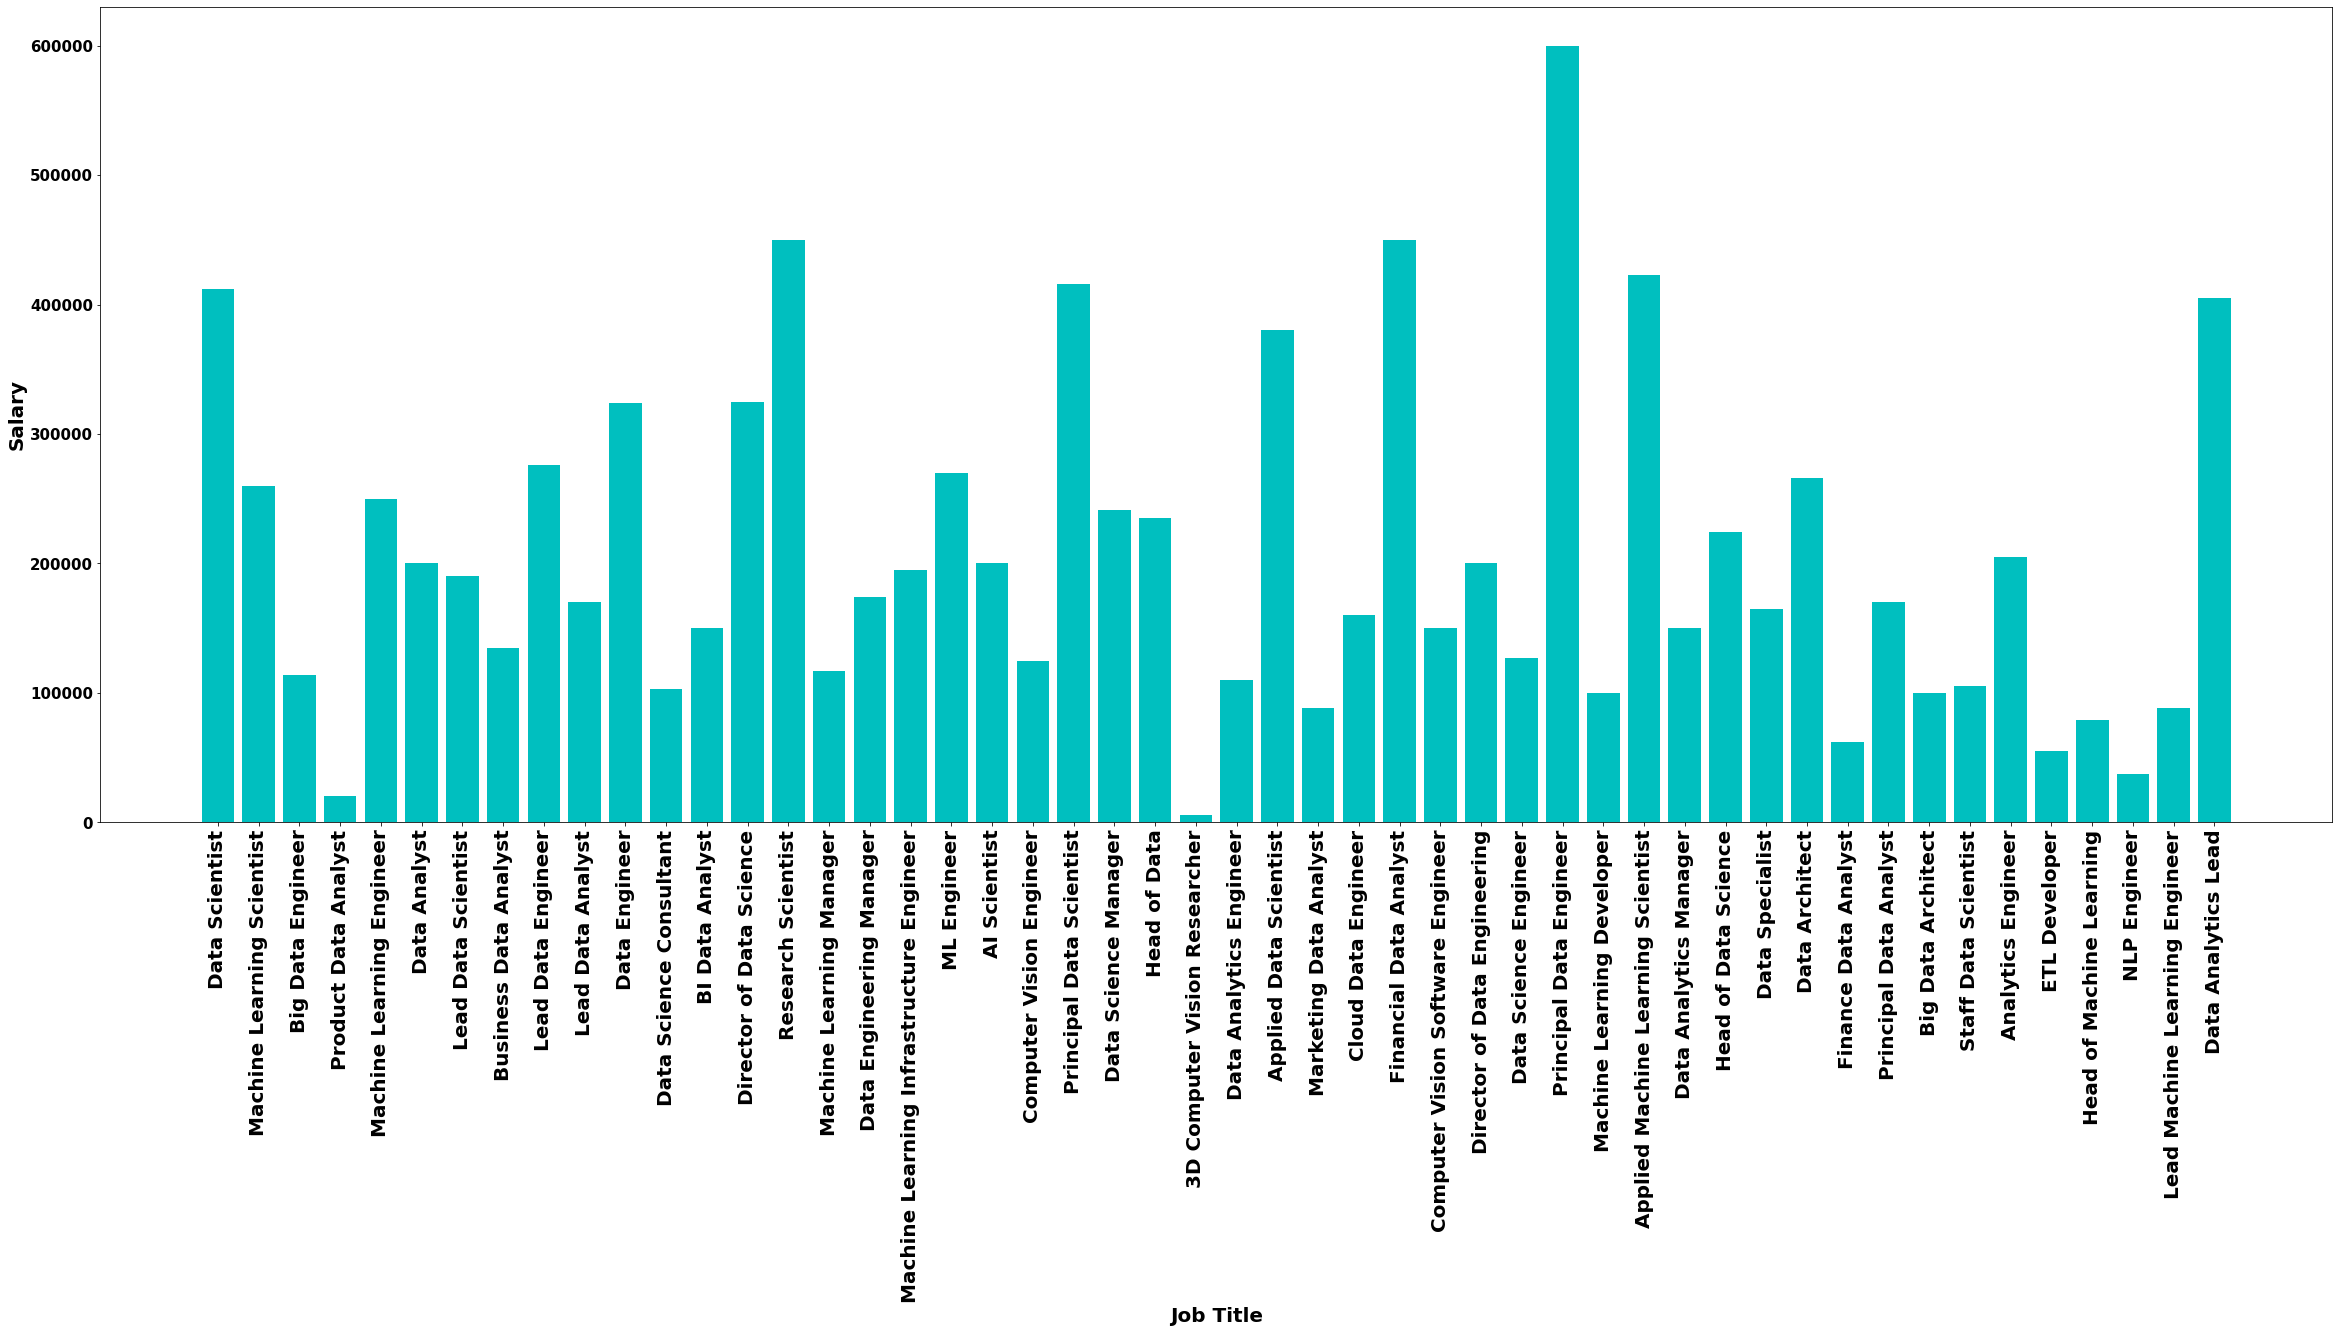

In [35]:
salary_df = pd.DataFrame(salary_df)
y = salary_df['salary_in_usd']
x = salary_df['job_title']
pr = plt.figure(figsize=(40, 15))
plt.xlabel("Job Title",fontweight='bold',fontsize=20)
plt.ylabel("Salary",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold',rotation='vertical',fontsize=20)
plt.yticks(fontweight='bold',fontsize=15)
plt.bar(x,y, color='c',align='center')

<BarContainer object of 607 artists>

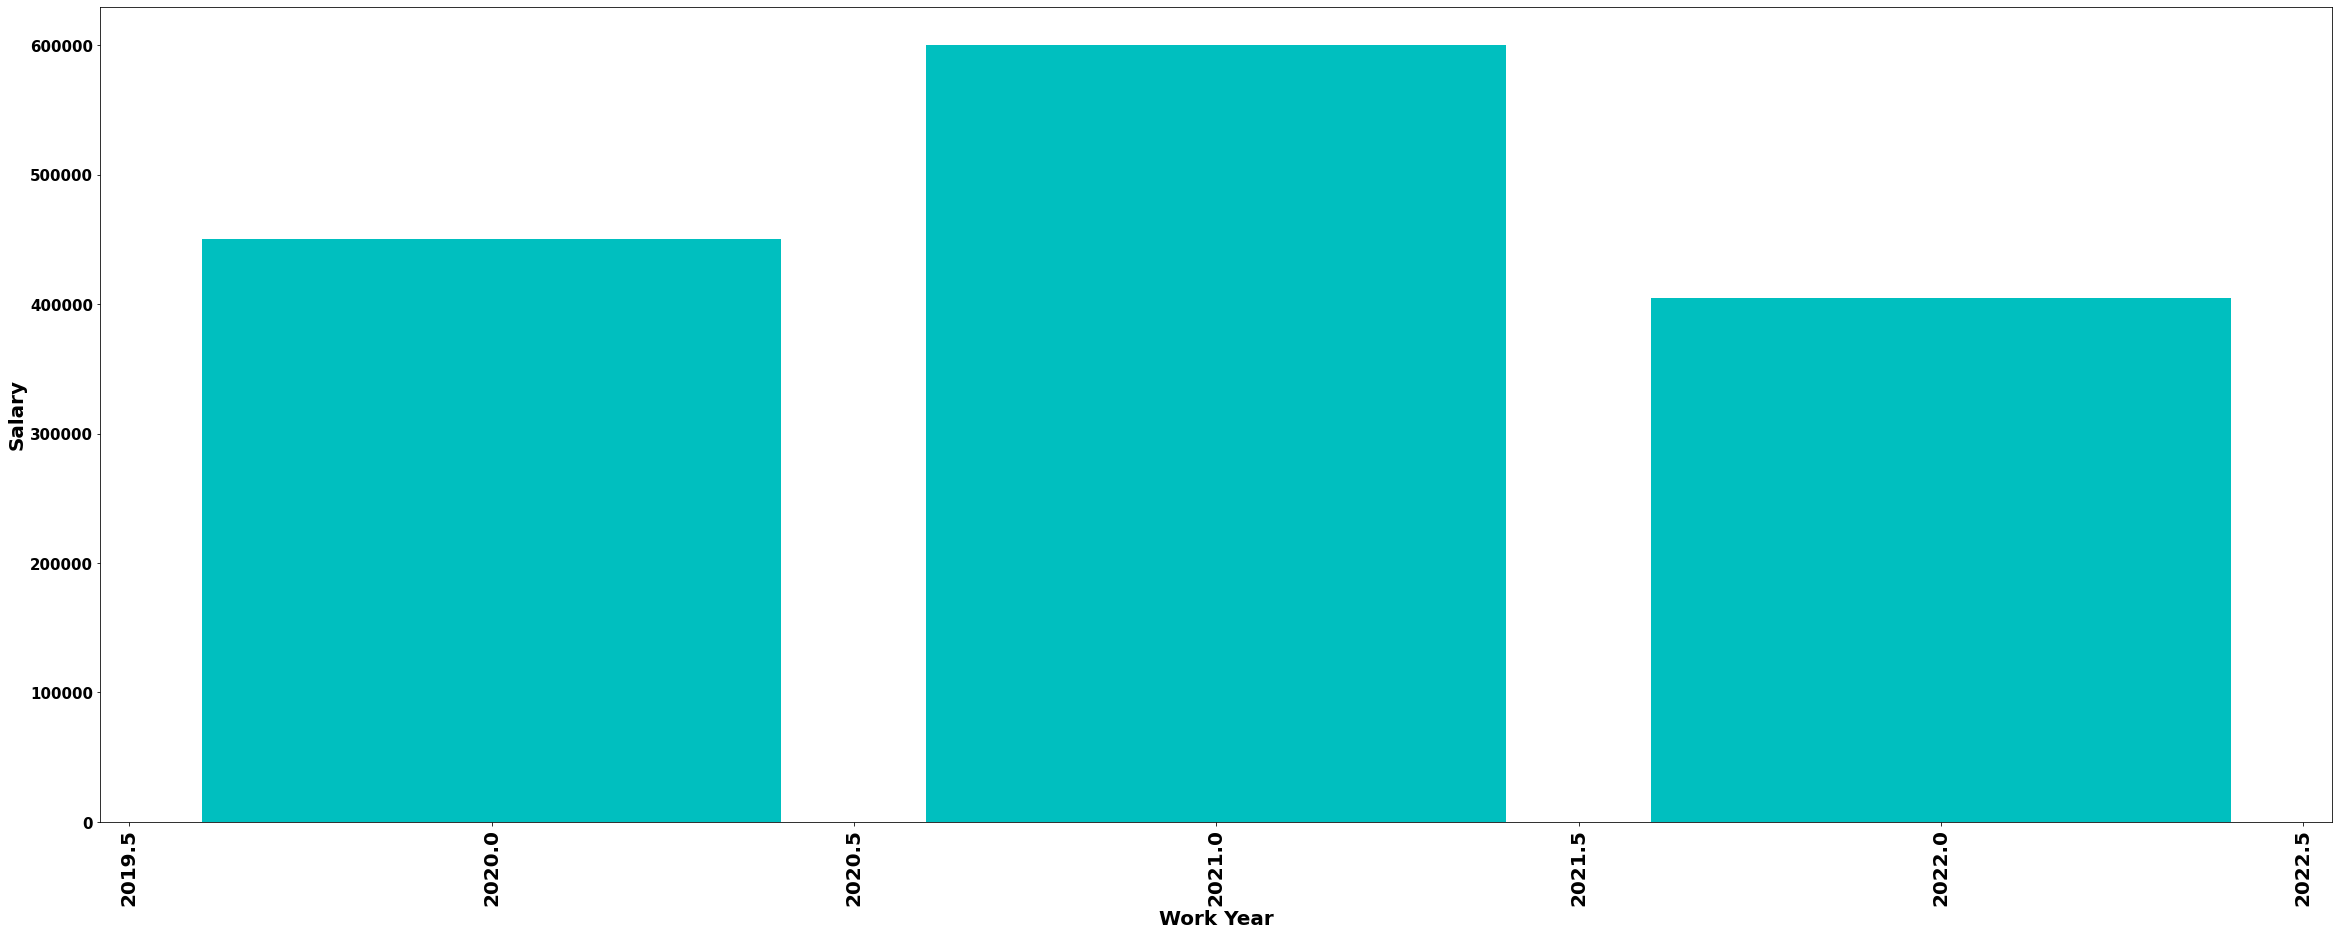

In [34]:
salary_df = pd.DataFrame(salary_df)
y = salary_df['salary_in_usd']
x = salary_df['work_year']
pr = plt.figure(figsize=(40, 15))
plt.xlabel("Work Year",fontweight='bold',fontsize=20)
plt.ylabel("Salary",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold',rotation='vertical',fontsize=20)
plt.yticks(fontweight='bold',fontsize=15)
plt.bar(x,y, color='c',align='center')

# Ouestions And Answers

### 1. Highest Earned by Profession for Each Year (2020 - 2022)

In 2020;

In [37]:
# Highest earner for all data professions in USD in 2020

highest_earn_2020 = salary_df[salary_df.work_year == 2020]
highest_earn_2020 = highest_earn_2020.groupby(['job_title', 'experience_level', 'company_size', 'company_location']).max() ['salary_in_usd'].reset_index()
highest_earn_2020 = highest_earn_2020.sort_values('salary_in_usd', ascending= False).head(10)
highest_earn_2020

,job_title,experience_level,company_size,company_location,salary_in_usd
65,Research Scientist,MI,M,US,450000
44,Data Scientist,SE,L,US,412000
46,Director of Data Science,EX,L,US,325000
60,Machine Learning Scientist,SE,S,JP,260000
53,Machine Learning Engineer,EN,L,US,250000
28,Data Science Manager,SE,M,US,190200
51,Lead Data Scientist,SE,S,US,190000
22,Data Engineer,SE,L,US,188000
56,Machine Learning Engineer,SE,L,US,150000
61,Principal Data Scientist,SE,M,DE,148261


Displaying the top 10, a Research Scientist with a mid level experience working in medium size company in United states, was our highest earner in 2020.

### For 2021;

In [38]:
# Highest earner for all data professions in USD in 2021

highest_earn_2021 = salary_df[salary_df.work_year == 2021]
highest_earn_2021 = highest_earn_2021.groupby(['job_title', 'experience_level', 'company_size', 'company_location']).max() ['salary_in_usd'].reset_index()
highest_earn_2021 = highest_earn_2021.sort_values('salary_in_usd', ascending= False).head(10)
highest_earn_2021

,job_title,experience_level,company_size,company_location,salary_in_usd
151,Principal Data Engineer,EX,L,US,600000
113,Financial Data Analyst,MI,L,US,450000
7,Applied Machine Learning Scientist,MI,L,US,423000
154,Principal Data Scientist,EX,S,US,416000
121,Lead Data Engineer,SE,L,US,276000
125,ML Engineer,MI,L,US,270000
127,ML Engineer,SE,S,US,256000
109,Director of Data Science,EX,L,US,250000
71,Data Science Manager,SE,L,US,240000
156,Principal Data Scientist,SE,L,US,235000


For 2021, a Principal Data Engineer with a Executive level experience working in large size company in United states, was our highest earner.

### For 2022;

In [39]:
# Highest earner for all data professions in USD in 2022

highest_earn_2022 = salary_df[salary_df.work_year == 2022]
highest_earn_2022 = highest_earn_2022.groupby(['job_title', 'experience_level', 'company_size', 'company_location']).max() ['salary_in_usd'].reset_index()
highest_earn_2022 = highest_earn_2022.sort_values('salary_in_usd', ascending= False).head(10)
highest_earn_2022

,job_title,experience_level,company_size,company_location,salary_in_usd
25,Data Analytics Lead,SE,L,US,405000
5,Applied Data Scientist,SE,L,US,380000
33,Data Engineer,EX,M,US,324000
28,Data Architect,SE,M,US,266400
61,Data Scientist,SE,M,US,260000
42,Data Engineer,SE,M,US,243900
44,Data Science Manager,MI,M,US,241000
67,Head of Data Science,EX,M,US,224000
80,Machine Learning Engineer,SE,M,US,220000
59,Data Scientist,SE,L,US,215300


For 2022,Data Analytics Lead with a Senior level experience working in large size company in United states take the highest Salary

From this analysis, we can deduce that your job title alone isn't the only factor dictating salary, hence the disparity. We need to take into consideration your experience level, company location and company size.

### 2. Average Earning Per Job Title
let's find out on average, which job titles pay

In [42]:
# Average earning per job_title

average_earn_df = salary_df.groupby(['job_title']).mean() ['salary_in_usd'].reset_index()
average_earn_df = average_earn_df.sort_values('salary_in_usd', ascending= False).head(10)
average_earn_df

,job_title,salary_in_usd
14,Data Analytics Lead,405000.000000
45,Principal Data Engineer,328333.333333
28,Financial Data Analyst,275000.000000
46,Principal Data Scientist,215242.428571
25,Director of Data Science,195074.000000
16,Data Architect,177873.909091
3,Applied Data Scientist,175655.000000
2,Analytics Engineer,175000.000000
23,Data Specialist,165000.000000
29,Head of Data,160162.600000


<AxesSubplot:title={'center':'Average earning per job title'}, xlabel='job_title'>

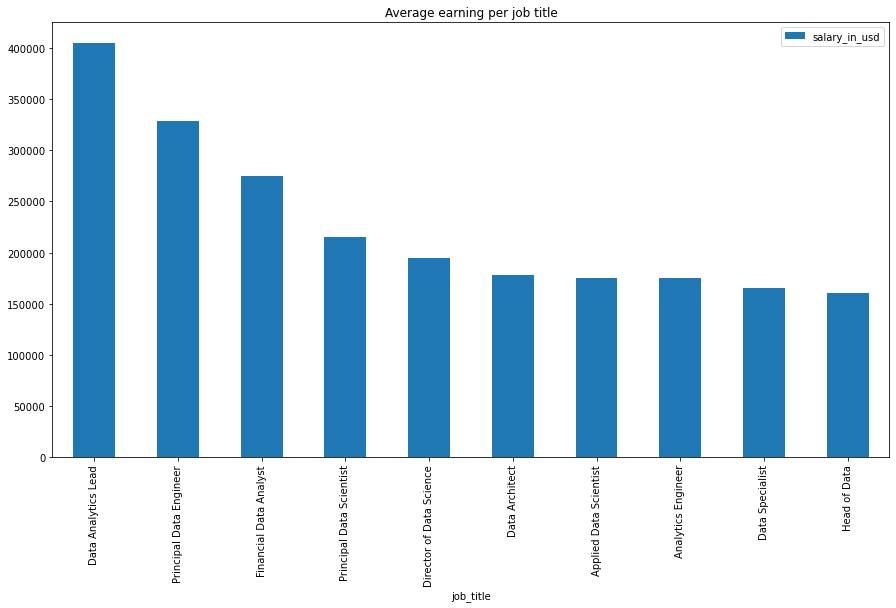

In [44]:
# Displaying in bar chat:

average_earn_df.plot(kind='bar', x='job_title', y='salary_in_usd', title='Average earning per job title', figsize=(15,8))

### 3. Average Pay of Job Titles per Region
from previous analysis, you can see that United states takes the rank as the highest paying jobs.
we perform analysis to see how the average pay in US, compares with the rest of the region in the dataset.

In [45]:
# Average pay of job titles per region
# US:

pay_us_df = salary_df[salary_df.company_location=='US']
pay_us_df = pay_us_df.groupby(['job_title']).mean() ['salary_in_usd'].reset_index()
pay_us_df = pay_us_df.sort_values('salary_in_usd', ascending= False).head(10)
pay_us_df

,job_title,salary_in_usd
12,Data Analytics Lead,405000.000000
35,Principal Data Engineer,328333.333333
22,Director of Data Science,287500.000000
23,Financial Data Analyst,275000.000000
29,ML Engineer,263000.000000
36,Principal Data Scientist,255500.000000
2,Applied Data Scientist,238000.000000
24,Head of Data,217500.000000
21,Director of Data Engineering,200000.000000
31,Machine Learning Infrastructure Engineer,195000.000000


#### Comparing this with the rest of the regions:

In [46]:
# Average pay of job titles per region
# Rest of the region:

pay_out_df = salary_df[salary_df.company_location!='US']
pay_out_df = pay_out_df.groupby(['job_title']).mean() ['salary_in_usd'].reset_index()
pay_out_df = pay_out_df.sort_values('salary_in_usd', ascending= False).head(10)
pay_out_df

,job_title,salary_in_usd
36,Machine Learning Scientist,165666.666667
39,Principal Data Scientist,161565.666667
21,Director of Data Science,158103.600000
10,Computer Vision Software Engineer,150000.000000
13,Data Architect,141550.000000
18,Data Science Manager,123332.500000
24,Head of Data,121937.666667
35,Machine Learning Manager,117104.000000
28,Lead Data Engineer,115449.000000
20,Director of Data Engineering,113476.000000


Comparing both results

In [47]:
compare = pd.merge(pay_us_df,pay_out_df[['job_title', 'salary_in_usd']],on='job_title', how='left').dropna().head(10)
compare

,job_title,salary_in_usd_x,salary_in_usd_y
2,Director of Data Science,287500.0,158103.600000
5,Principal Data Scientist,255500.0,161565.666667
7,Head of Data,217500.0,121937.666667
8,Director of Data Engineering,200000.0,113476.000000


<AxesSubplot:title={'center':'Comparison of average pay per job title for US Companies to Non-US Companies'}, xlabel='job_title'>

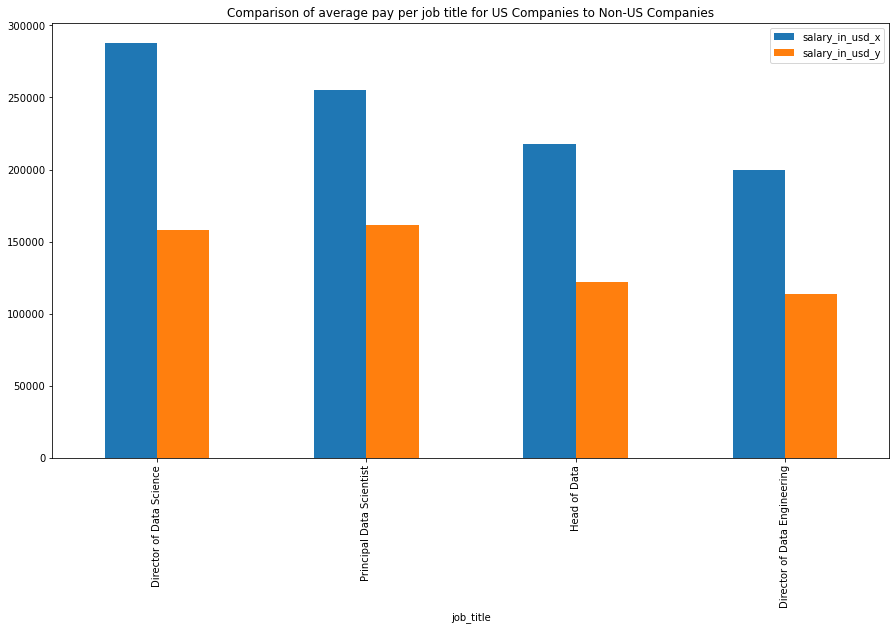

In [53]:
compare.plot(kind='bar', figsize= (15,8), x='job_title', title='Comparison of average pay per job title for US Companies to Non-US Companies')

Average salaries of US companies are represented by salary_usd_x and other countries are represented by salary_usd_y
From the diagram above you can see companies from US offer more salary accros board for all positions, as compare to other countries.

###  4. Does Experience Level have effect on salary

In [ ]:
# Comparing average pay by experience level

exp_df = salary_df.groupby('experience_level').mean() ['salary_in_usd'].reset_index()
exp_df = exp_df.sort_values('salary_in_usd', ascending=False)
exp_df

<AxesSubplot:title={'center':'Experience Level on Salary'}, xlabel='experience_level'>

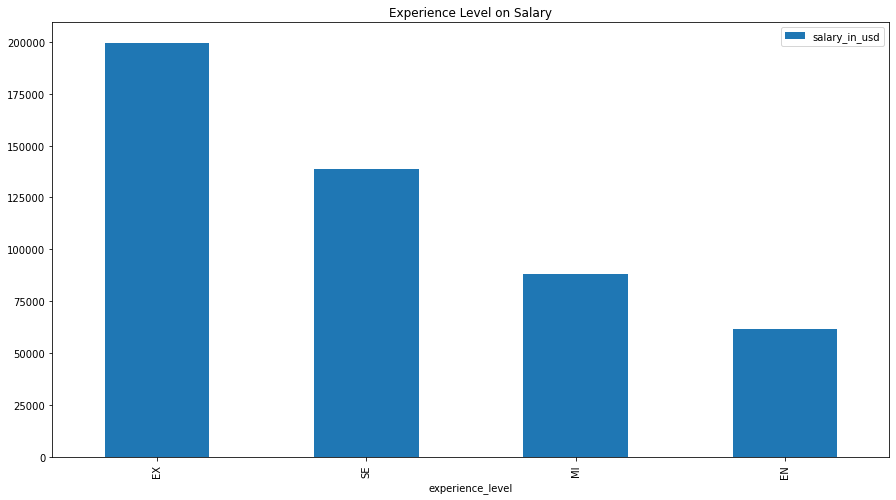

In [58]:
exp_df.plot(kind='bar', figsize= (15,8), x='experience_level', y='salary_in_usd', title='Experience Level on Salary')

From the graph, it shows as that Executive position takes more salary and the Entry level are the lowest of it.

### 5. What is the Effect of Company Size on Salary

In [60]:
# Average pay of campany size per region
# US:

com_us_df = salary_df[salary_df.company_location=='US']
com_us_df = com_us_df.groupby(['company_size']).mean() ['salary_in_usd'].reset_index()
com_us_df = com_us_df.sort_values('salary_in_usd', ascending= False).head(10)
com_us_df

,company_size,salary_in_usd
0,L,160967.188679
1,M,141446.839450
2,S,104570.483871


In [61]:
# Average pay of job titles per region
# Rest of the region:

com_out_df = salary_df[salary_df.company_location!='US']
com_out_df = com_out_df.groupby(['company_size']).mean() ['salary_in_usd'].reset_index()
com_out_df = com_out_df.sort_values('salary_in_usd', ascending= False).head(10)
com_out_df

,company_size,salary_in_usd
0,L,71169.467391
1,M,67368.250000
2,S,61573.596154


In [62]:
com_us_out = pd.merge(com_us_df,com_out_df[['company_size', 'salary_in_usd']],on='company_size', how='left').dropna().head(10)
com_us_out

,company_size,salary_in_usd_x,salary_in_usd_y
0,L,160967.188679,71169.467391
1,M,141446.839450,67368.250000
2,S,104570.483871,61573.596154


<AxesSubplot:title={'center':'Comparison of Average Salary Per Company Size of US Companies and Non-US Companies'}, xlabel='company_size'>

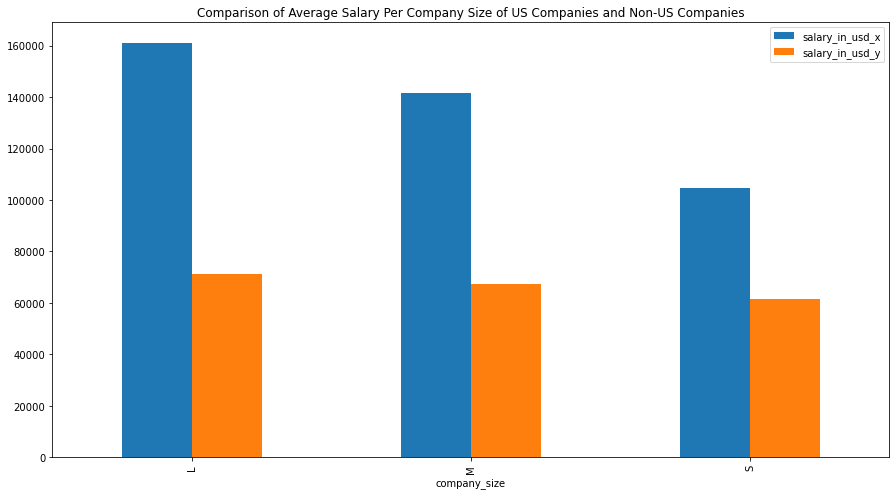

In [64]:
com_us_out.plot(kind='bar', figsize= (15,8), x='company_size', title='Comparison of Average Salary Per Company Size of US Companies and Non-US Companies')

Average salaries of US companies are represented by salary_usd_x and other countries are represented by salary_usd_y
From the diagram above you can see companies from US offer more salary accros board for all sizes, as compare to other countries.

### 6. What is the Effect of Remote Work on Salary

In [65]:
rem_df = salary_df.groupby('remote_ratio').mean() ['salary_in_usd'].reset_index()
rem_df = rem_df.sort_values('salary_in_usd', ascending=False)
rem_df

,remote_ratio,salary_in_usd
2,100,122457.454068
0,0,106354.622047
1,50,80823.030303


<AxesSubplot:title={'center':'Experience Level on Salary'}, xlabel='remote_ratio'>

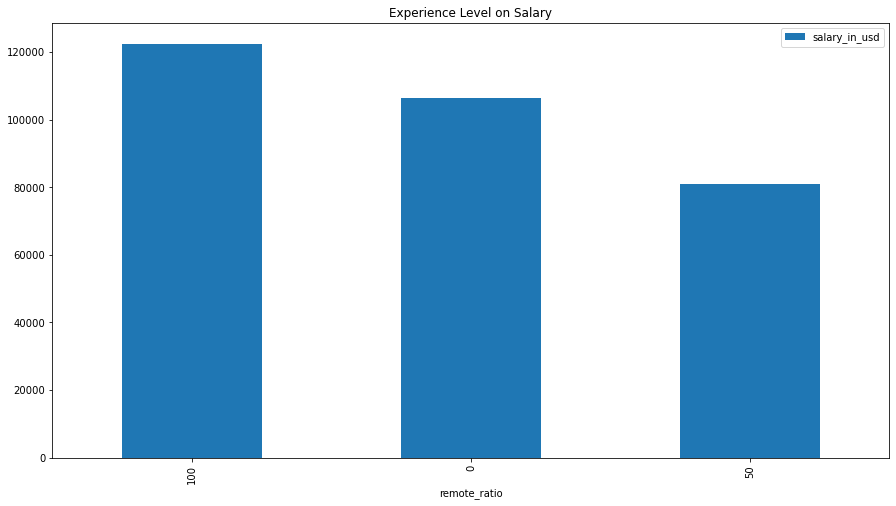

In [66]:
rem_df.plot(kind='bar', figsize= (15,8), x='remote_ratio', y='salary_in_usd', title='Remote experience on Salary')

### 7. What is the Effect of Employment type on Salary

In [69]:
emp_type_df = salary_df.groupby('employment_type').mean() ['salary_in_usd'].reset_index()
emp_type_df = emp_type_df.sort_values('salary_in_usd', ascending=False)
emp_type_df

,employment_type,salary_in_usd
0,CT,184575.000000
2,FT,113468.073129
1,FL,48000.000000
3,PT,33070.500000


<AxesSubplot:title={'center':'Employment type on Salary'}, xlabel='employment_type'>

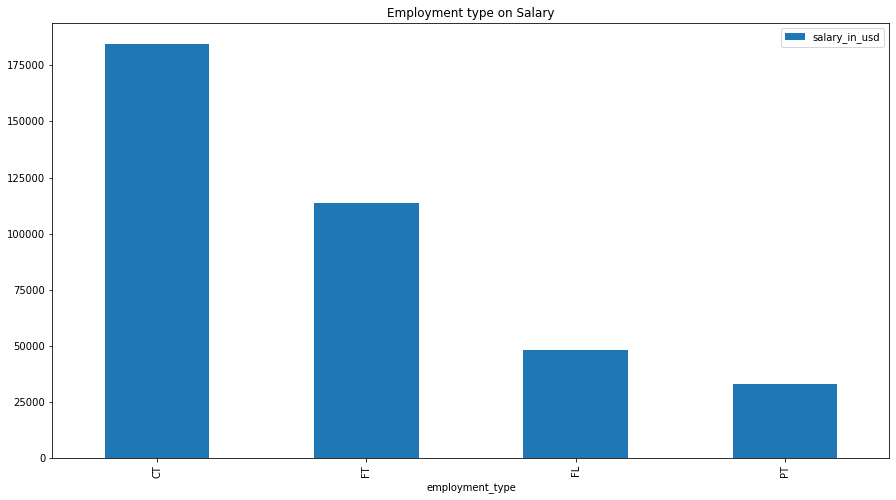

In [71]:
emp_type_df.plot(kind='bar', figsize= (15,8), x='employment_type', y='salary_in_usd', title='Employment type on Salary')

## Conclusion

1. From our analysis, the top paying roles are Data Analytics Lead and Principal Data Engineer, However the most senior roles.

2. Although entry roles pay the least, but getting the role at US will be rewarding and doing it as a remote will be advantageous because per analysis 100% remote role pay the best rate.

3. Full-time roles and contract roles are most profitable employment option.

4. Large Companies pay more salary than small companies naturally, howevwer, when you break the analysis further small companies in US pay more than large companies in non-US countries. Meaning getting a role in a company in US would be best way to accelerate yoour career growth.

5. Average Salary is much higher in the US for the same position in oher countries